<a href="https://colab.research.google.com/github/Abhiruchi37/DWKM-STOCKANALYSIS/blob/main/DWKM_MOD2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!pip install yfinance #yfinance is a library with the price time series.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 7]
plt.rc('font', size=15)

In [4]:
name = 'GOOG' #Google price data
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2018-03-15",end="2020-09-10") #from 2018 to 2
x = df['Close']


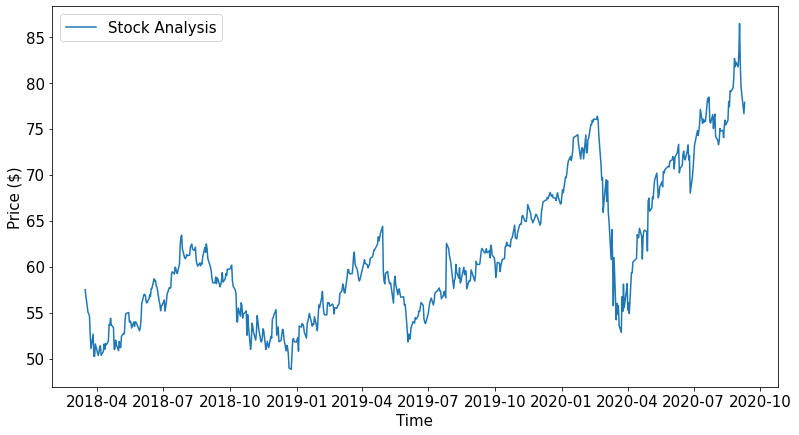

In [5]:
plt.plot(x,label="Stock Analysis")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [6]:
returns = x.pct_change(1).dropna() #to find change in closing price with 1 day lag

In [7]:
returns[0:10]

Date
2018-03-16 00:00:00-04:00   -0.012048
2018-03-19 00:00:00-04:00   -0.031618
2018-03-20 00:00:00-04:00   -0.001918
2018-03-21 00:00:00-04:00   -0.006222
2018-03-22 00:00:00-04:00   -0.038318
2018-03-23 00:00:00-04:00   -0.026223
2018-03-26 00:00:00-04:00    0.030972
2018-03-27 00:00:00-04:00   -0.045679
2018-03-28 00:00:00-04:00   -0.000537
2018-03-29 00:00:00-04:00    0.027106
Name: Close, dtype: float64

In [8]:
(x[1]-x[0])/x[0]

-0.012047896919087257

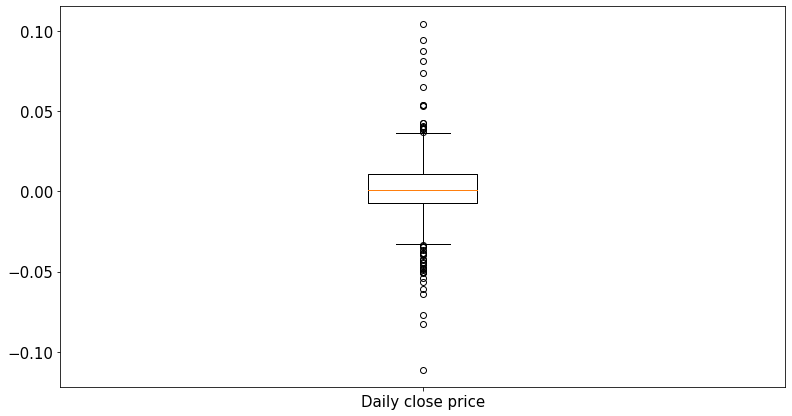

In [9]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show() #the IQR is narrow, this is called fat tails that is common in stock analysis

In [10]:
returns.describe()

count    626.000000
mean       0.000679
std        0.019731
min       -0.111008
25%       -0.007031
50%        0.001005
75%        0.010532
max        0.104485
Name: Close, dtype: float64

In [11]:
np.mean(returns) #positive drift

0.0006793906623659985

In [12]:
np.median(returns)

0.0010054382086300828

In [13]:
np.mod(returns,x)

Date
2018-03-15 00:00:00-04:00          NaN
2018-03-16 00:00:00-04:00    56.774451
2018-03-19 00:00:00-04:00    54.959383
2018-03-20 00:00:00-04:00    54.883583
2018-03-21 00:00:00-04:00    54.537777
                               ...    
2020-09-02 00:00:00-04:00     0.040687
2020-09-03 00:00:00-04:00    82.041988
2020-09-04 00:00:00-04:00    79.521061
2020-09-08 00:00:00-04:00    76.582636
2020-09-09 00:00:00-04:00     0.016034
Name: Close, Length: 627, dtype: float64

In [14]:
np.std(returns) #more than mean due to outliers

0.019715673081332163

In [15]:
np.quantile(returns,0.5)

0.0010054382086300828

In [16]:
skew(returns) #negative thus distribution is symmetrical; tail is on left

-0.07084208851121175

In [17]:
skewtest(returns)

SkewtestResult(statistic=-0.7311538372997008, pvalue=0.46468519309653733)

In [18]:
kurtosis(returns)

5.542845879286425

In [19]:
kurtosistest(returns)

KurtosistestResult(statistic=9.094543784712497, pvalue=9.498439712422488e-20)

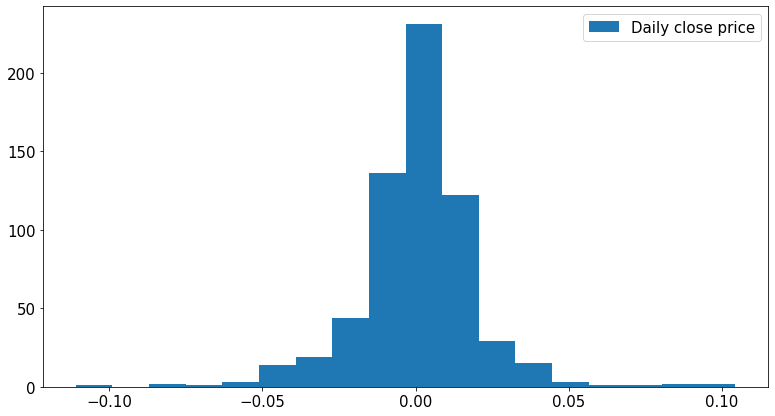

In [20]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

In [21]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

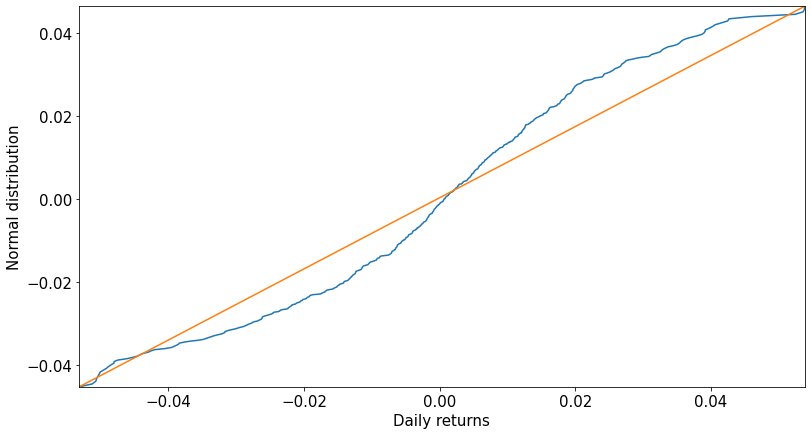

In [22]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show() 
#straight line- what we expect amd curved line-what we get; 
#quantiles of dataset aren’t comparable with the quantiles of a normal distribution
#thus'returns' isnt normally distributed

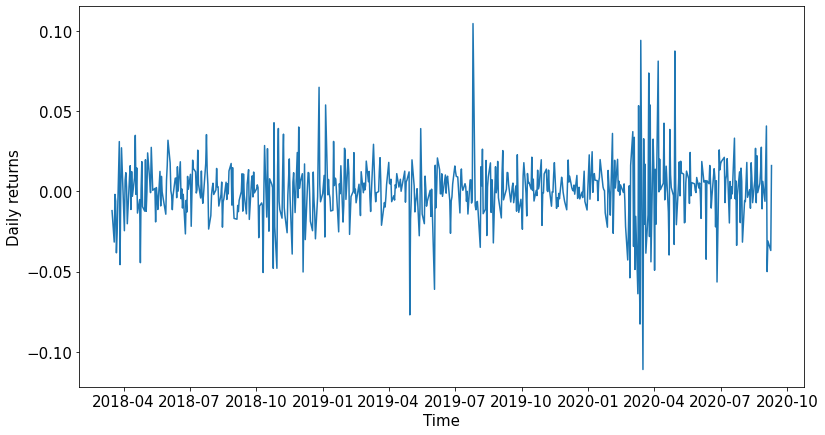

In [23]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()
#volatility clustering-common in stock analysis; std changes and time series also changes

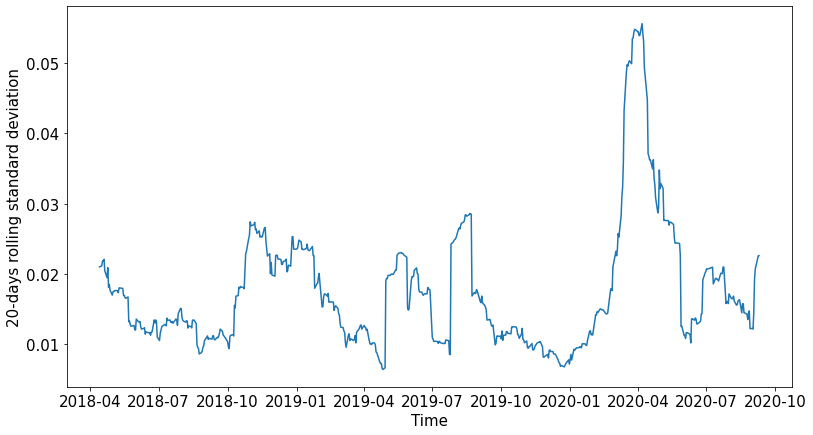

In [24]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()
#spikes and oscillations present thus the ouliers generated cant be ignored

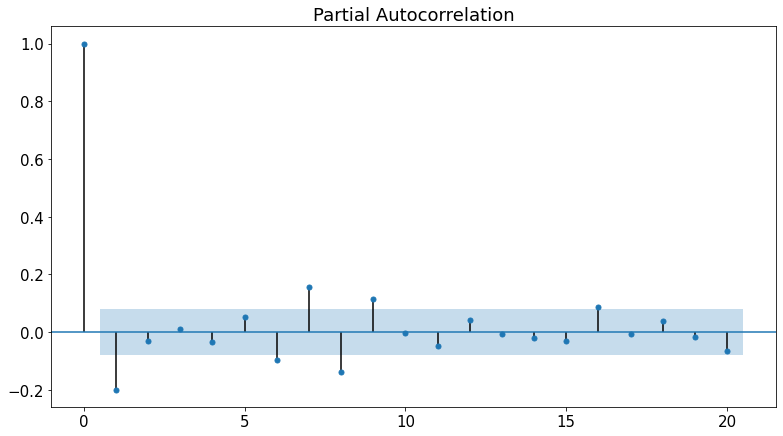

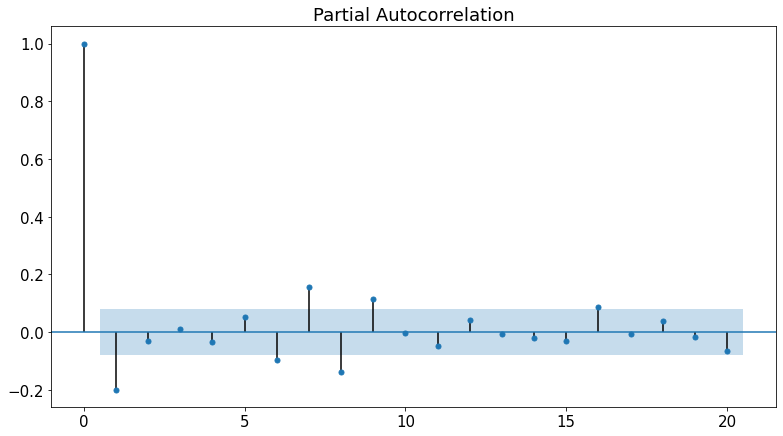

In [25]:
plot_pacf(returns,lags=20)